<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>GIRON, JERIC S.<br>
    201913397 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [510]:
import pandas as pd

In [511]:
## Saving those files here to view datas in this notebook.
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [512]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [513]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0] 
costs_mat = np.array(df_prices)[1]

prices_mat = prices_mat.reshape((12,1))  
costs_mat = costs_mat.reshape((12,1)) 


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [550]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
                 
    monthly_revenue = (sales_mat @ prices_mat)
    monthly_costs = (sales_mat @ costs_mat)
    monthly_profits = (monthly_revenue - monthly_costs)

    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [573]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [552]:
print(f' \t\t\t Monthly Revenue: \n\n{month_rev}\n')  
print(f' \t\t\t Monthly Costs: \n\n{month_cost}\n')
print(f' \t\t\t Monthly Profits: \n\n{month_profit}\n')


 			 Monthly Revenue: 

[160215  68730 198860  64830 143655  71835 116215  66620 126250  73355
  75295 261125]

 			 Monthly Costs: 

[108442  45753 133177  44058  94868  47086  79952  44114  87730  50319
  51082 176836]

 			 Monthly Profits: 

[51773 22977 65683 20772 48787 24749 36263 22506 38520 23036 24213 84289]



## Part 2: Flavor Sales

In [630]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    
    flavor_revenue = (sales_mat @ prices_mat)
    flavor_costs = (sales_mat @ costs_mat)
    flavor_profits = flavor_revenue - flavor_costs  
    
    return flavor_profits.flatten()

In [640]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [637]:
print(f'\t\t\t Profit per Month: \n ', flavor_profit)

			 Profit per Month: 
  [51773 22977 65683 20772 48787 24749 36263 22506 38520 23036 24213 84289]


In [559]:
Flavors= [('Red Velvet',51773),
             ('Oreo',22977),
             ('Sugar Glared',65683),
             ('Almond Honey', 20772),
             ('Matcha', 48787),
             ('Strawberry Cream', 24749),
             ('Brown Sugar Boba', 36263),
             ('Fruits and Nuts', 22506),
             ('Dark Chocolate', 38520),
             ('Chocolate and range', 23036),
             ('Choco Mint', 24213),
             ('Choco Butter Naught', 84289)
]

In [521]:
top3 = sorted(Flavors, key=lambda x: x[1], reverse = True)[:3]
besttop3 = []
for best in top3:
  besttop3.append(best[0])
print('\tThe Best Top 3 Flavors Are:')

besttop3

	The Best Top 3 Flavors Are:


['Choco Butter Naught', 'Sugar Glared', 'Red Velvet']

In [522]:
top3 = sorted(Flavors, key=lambda x: x[1], reverse = False)[:3]
besttop3 = []
for best in top3:
  besttop3.append(best[0])
print('\tThe Worst Top 3 Flavors Are:')

besttop3

	The Worst Top 3 Flavors Are:


['Almond Honey', 'Fruits and Nuts', 'Oreo']

## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [371]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

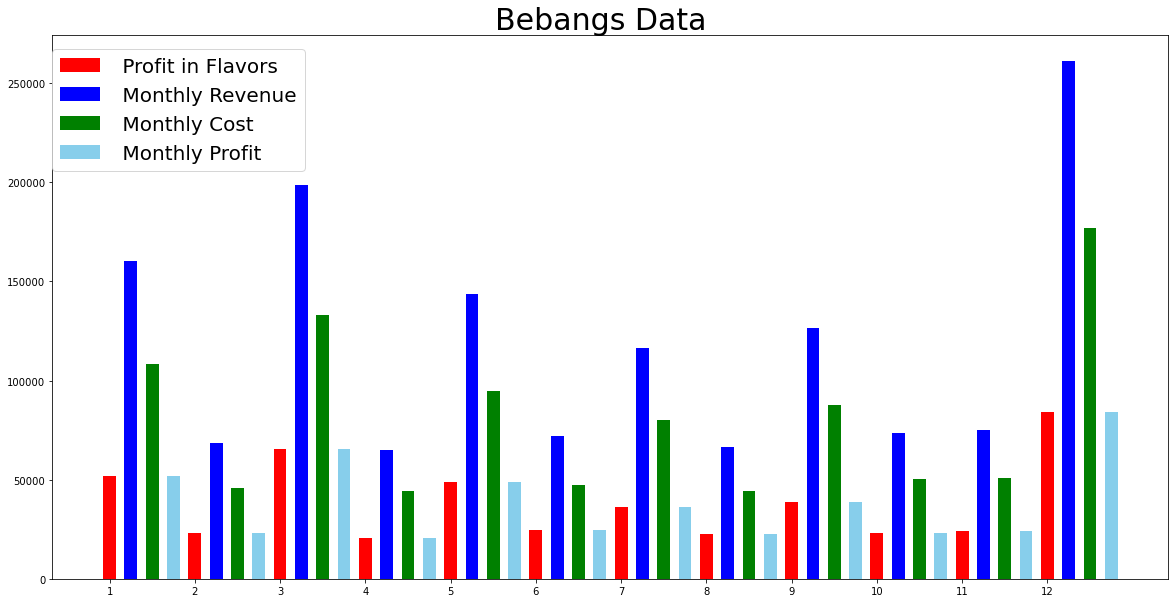

In [644]:
plt.figure(figsize=(20,10))
x=np.arange(12)

Match = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.bar(x+0.00,flavor_profit, color = 'r', width = 0.15, label =" Profit in Flavors")
plt.bar(x+0.25,month_rev, color = 'b', width = 0.15, label =" Monthly Revenue")
plt.bar(x+0.50,month_cost, color = 'g', width = 0.15, label =" Monthly Cost")
plt.bar(x+0.75,month_profit, color = 'skyblue', width = 0.15, label =" Monthly Profit")


plt.xticks(x,Match)
plt.title('Bebangs Data  ', fontsize = 30)

plt.legend(fontsize=20, loc =(0,.75))

# Montly Sales

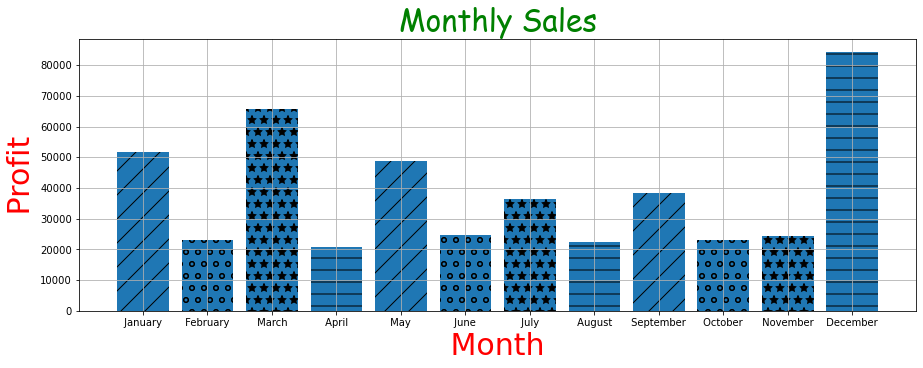

In [612]:
plt.figure(figsize=(15,5))
Months = [' January ',' February ',' March ', ' April ',' May ',' June ',
           ' July ',' August ',' September ',' October ',' November ',
           ' December ']

bars = plt.bar (Months,month_profit,)
plt.title(' Monthly Sales ',color = 'g', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 30 })
plt.ylabel(' Profit ',size = 30, color = 'r')
plt.xlabel(' Month ',size = 30, color = 'r')

bars[0].set_hatch('/')
bars[1].set_hatch('o')
bars[2].set_hatch('*')
bars[3].set_hatch('-')
bars[4].set_hatch('/')
bars[5].set_hatch('o')
bars[6].set_hatch('*')
bars[7].set_hatch('-')
bars[8].set_hatch('/')
bars[9].set_hatch('o')
bars[10].set_hatch('*')
bars[11].set_hatch('-')

plt.grid()
plt.show()


# Flavor Sales

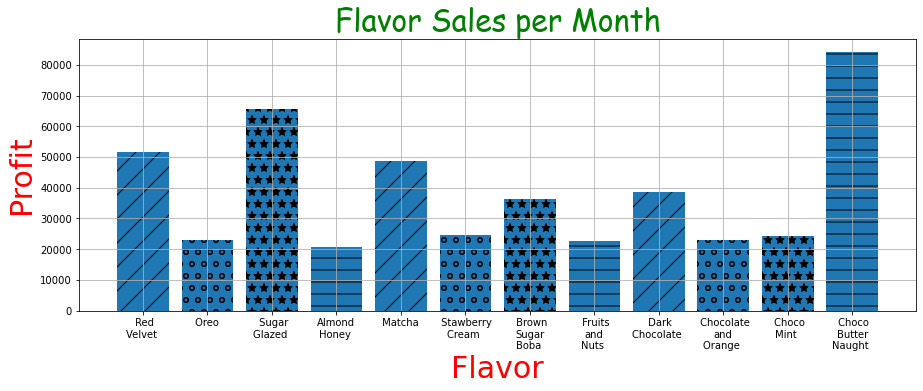

In [563]:
plt.figure(figsize=(15,5))
flavors = [' Red\nVelvet ',' Oreo ',' Sugar\nGlazed ', 'Almond\nHoney ',' Matcha ',' Stawberry\nCream ',
           ' Brown\nSugar\nBoba ',' Fruits\nand\nNuts ',' Dark\nChocolate ',' Chocolate\nand\nOrange ',' Choco\nMint ',
           ' Choco\nButter\nNaught ']

bars = plt.bar (flavors,flavor_profit)
plt.title('Flavor Sales per Month',color = 'g', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 30 })
plt.ylabel('Profit',size = 30, color = 'r')
plt.xlabel('Flavor',size = 30, color = 'r')

bars[0].set_hatch('/')
bars[1].set_hatch('o')
bars[2].set_hatch('*')
bars[3].set_hatch('-')
bars[4].set_hatch('/')
bars[5].set_hatch('o')
bars[6].set_hatch('*')
bars[7].set_hatch('-')
bars[8].set_hatch('/')
bars[9].set_hatch('o')
bars[10].set_hatch('*')
bars[11].set_hatch('-')

plt.grid()
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

In the given data, it can be seen that the highest profit was generated in the first quarter of the year. On the second and third quarter, the profit is slowly declining. But on the last quarter, on the month of November and December, the profit rose again. Moving on, the best selling flavors are the choco butter naught, matcha, and sugar glazed. While the worst selling flavors are Almond Honey, Fruits and Nuts, Oreo. With this data presented, Bebang will be easily informed regarding on how her business is doing. She will be able  to know which season or time of the year are weak in sales and profit and which flavors are not doing well. That way, she'll be able to work harder on business strategies and advertising. My recommendation for Bebang is that she should decrease the stocks of flavors with weak sales and profit and then slowly pull it out already if they're not still doing well in the following months. She could also add a twist on the other flavors and start new advertising strategies to further improve sales.